In [59]:
import math

import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [87]:
def gen_X(a, sigma, count):
    X = []
    for i in range(count):
        X.append(np.random.normal(a, sigma))
    return np.array(X)

In [88]:
def count_t(Y) -> float:
    y_mean = X2.mean()

    sx = np.sum([(x - x_mean) ** 2 for x in X1]) / n
    sy = np.sum([(y - y_mean) ** 2 for y in Y]) / m

    s = (sx * (n - 1) + sy * (m - 1)) / (n - 1 + m - 1)

    return (x_mean - y_mean) / (math.sqrt(s) * math.sqrt((1/n) + (1/m)))

In [113]:
n = 80
m = 80
step = 0.1
a1 = a2 = 0
sigma1 = sigma2 = 1
alpha = 0.05

In [114]:
X1 = gen_X(a1, sigma1, n)
X2 = gen_X(a2, sigma2, m)

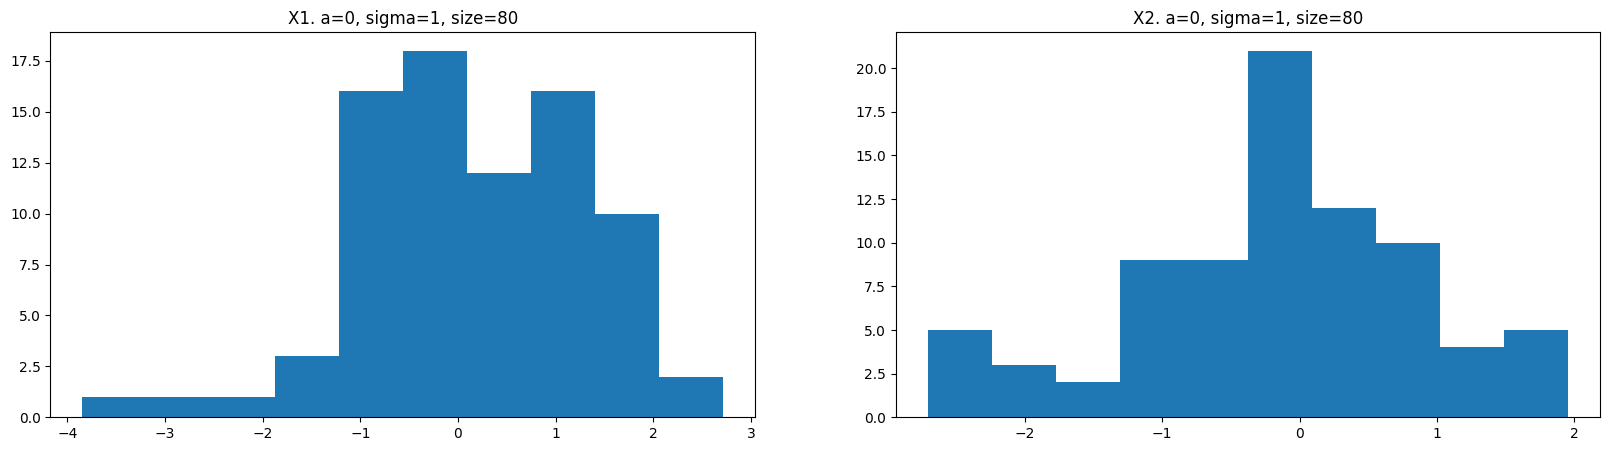

In [115]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(X1)
plt.title(f'X1. a={a1}, sigma={sigma1}, size={n}')

plt.subplot(122)
plt.hist(X2)
plt.title(f'X2. a={a2}, sigma={sigma2}, size={m}')

plt.show()

In [116]:
x_mean = X1.mean()
y_mean = X2.mean()

In [117]:
count_t(X2)

1.9638318065400842

In [118]:
b1, b2 = stats.t.interval(alpha=0.95, df=len(X1))
print(b1, b2)

-1.990063421028384 1.990063421028384


C:\Users\ipuzanov\AppData\Local\Temp\ipykernel_52584\4240945100.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  b1, b2 = stats.t.interval(alpha=0.95, df=len(X1))


In [119]:
b2 / step

19.90063421028384

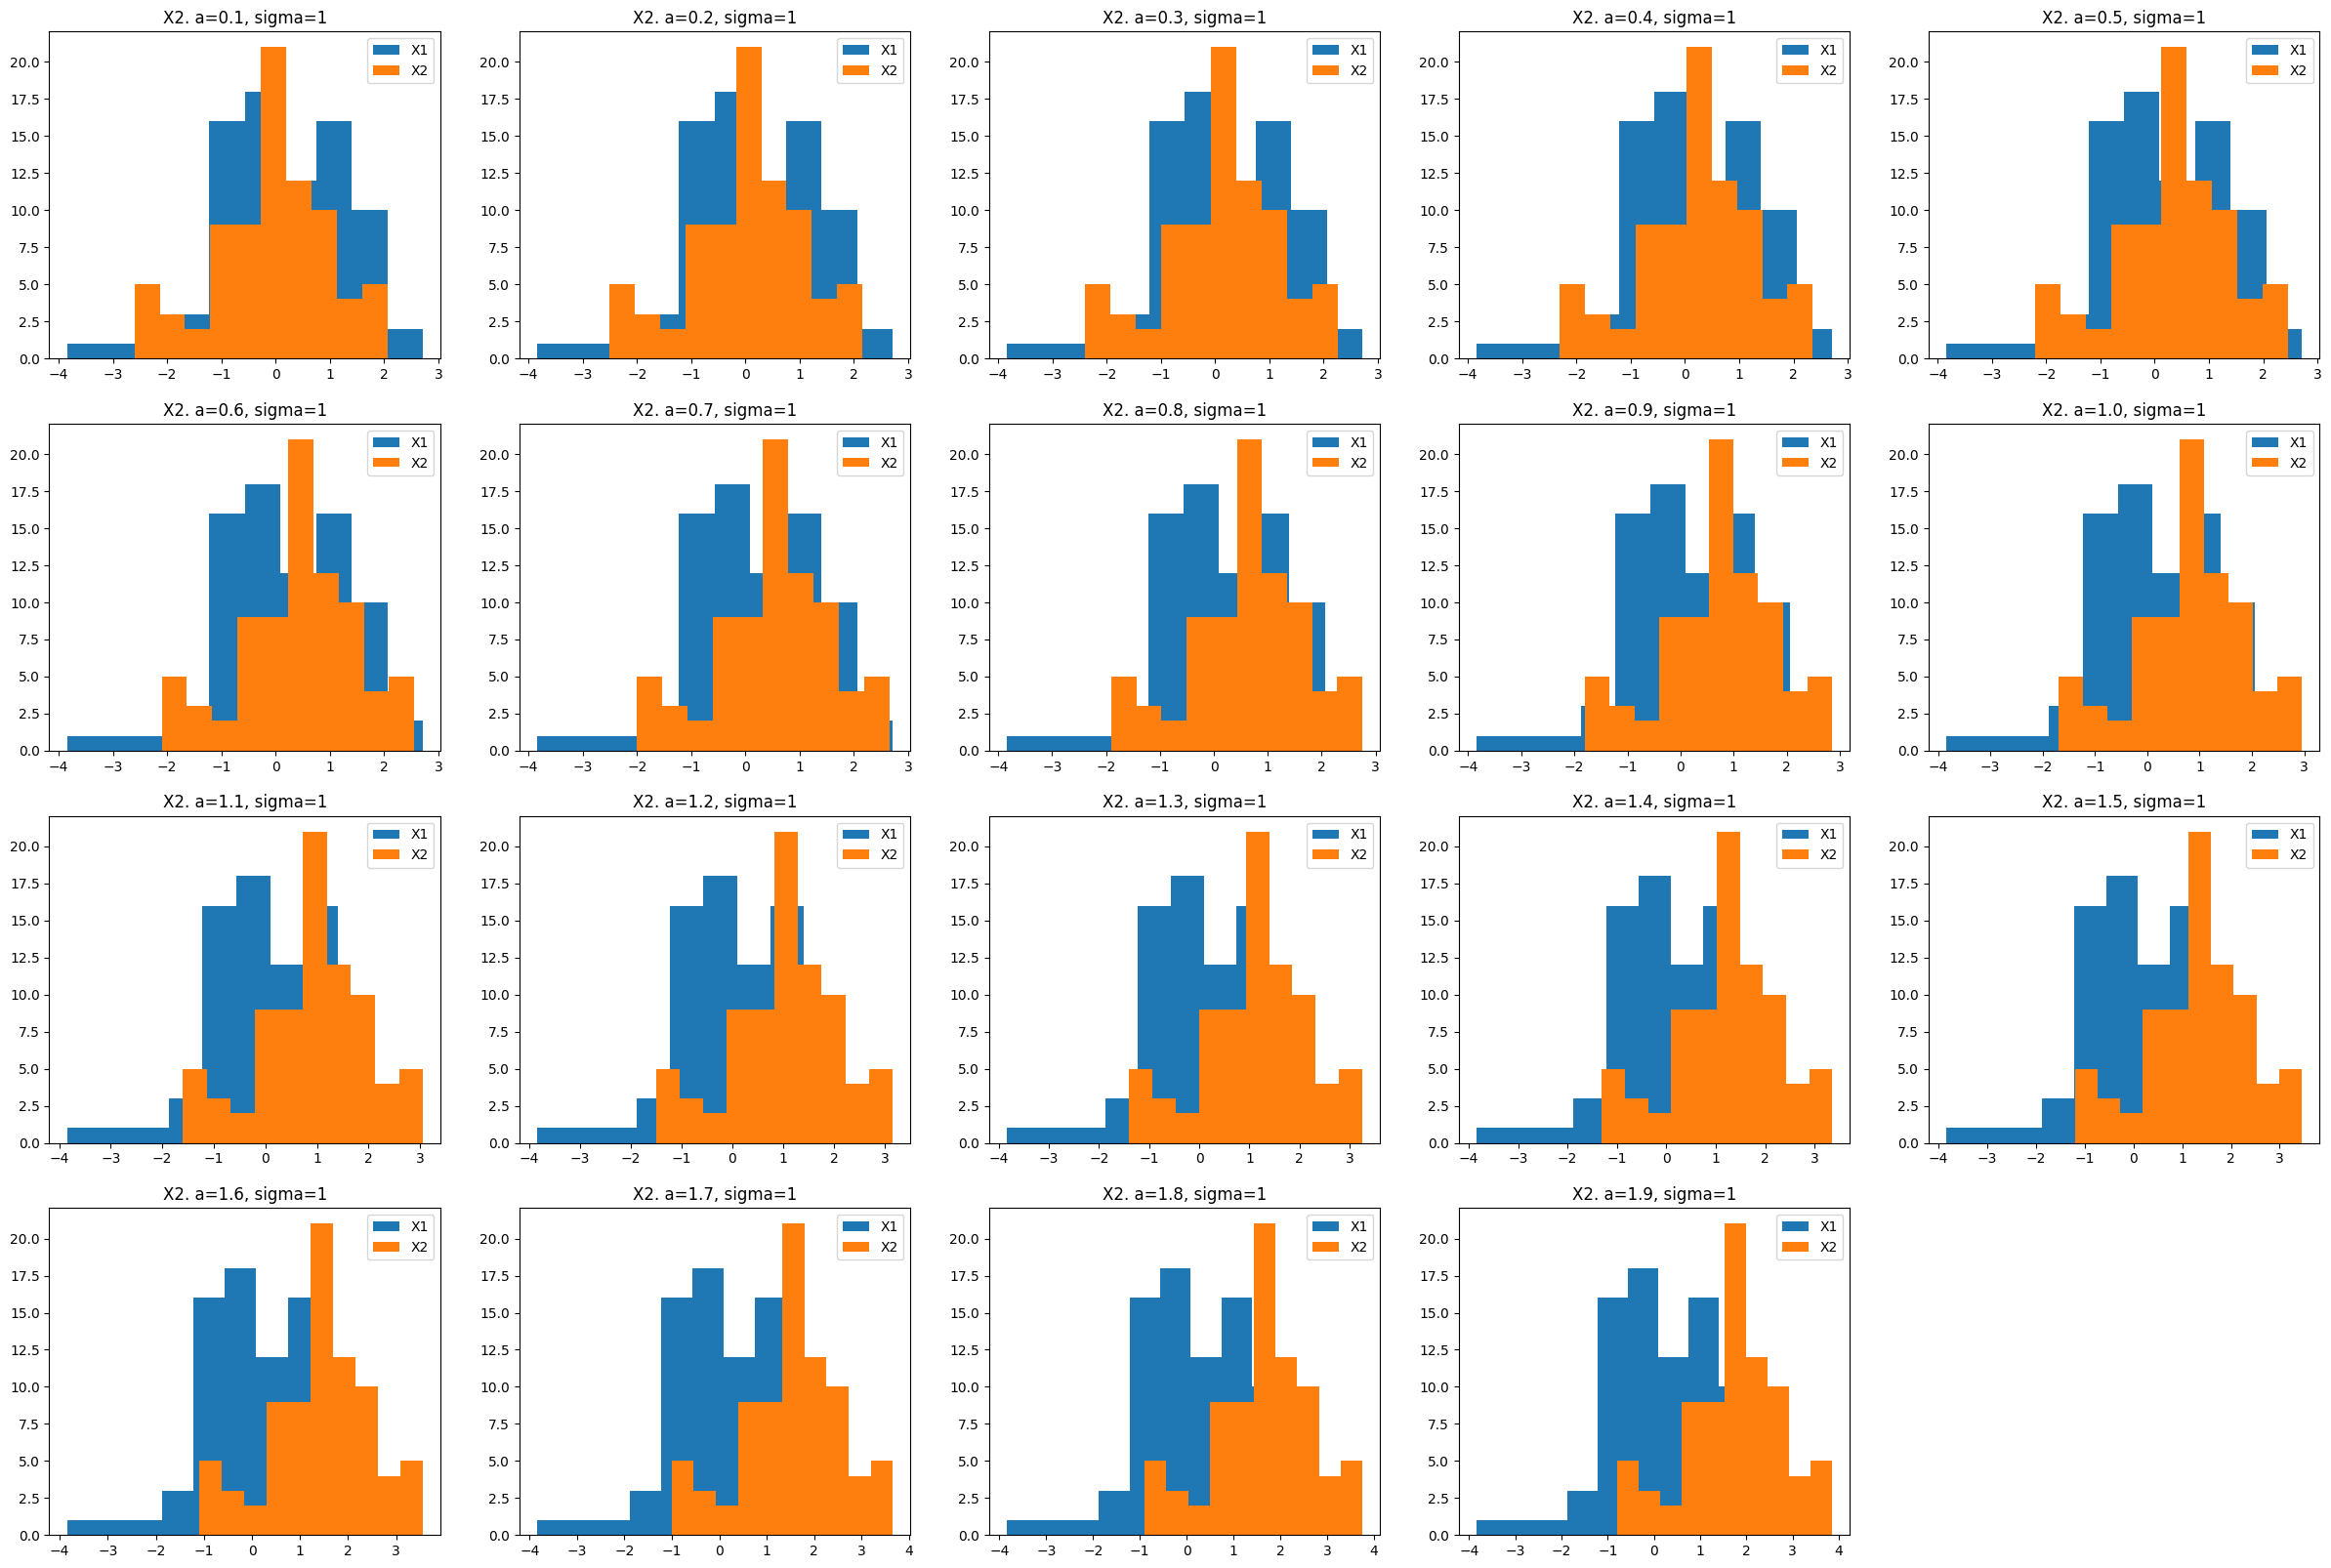

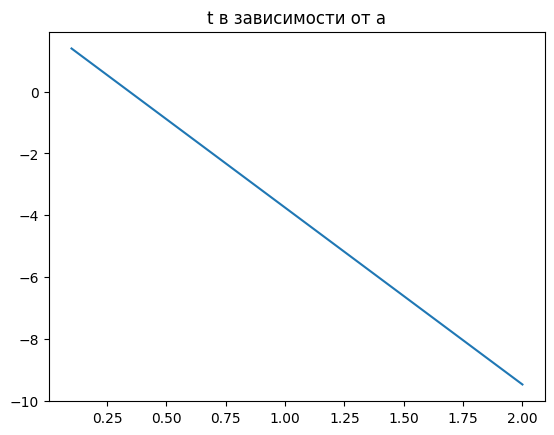

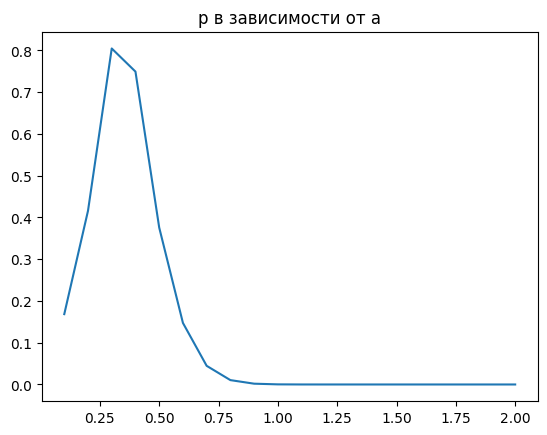

In [120]:
plt.figure(figsize=(30, 20))
ts = []
p_values = []
a_list = []
i = 0
a2 = 0
while True:
    a2 += step
    X2 += step

    p_value = stats.ttest_ind(X1, X2).pvalue
    p_values.append(p_value)

    t = count_t(X2)
    ts.append(t)
    a_list.append(a2)

    if i < (b2 / step) - 1:
        plt.subplot(4, 5, i + 1)
        plt.hist(X1, label='X1')
        plt.hist(X2, label='X2')
        plt.legend()
        plt.title(f'X2. a={round(a2, 2)}, sigma={sigma2}')
    # plt.show()
    if not (b1 < a2 < b2):
        break
    i+=1

plt.show()

plt.plot(a_list, ts)
plt.title('t в зависимости от a')
plt.show()


plt.plot(a_list, p_values)
plt.title('p в зависимости от a')
plt.show()